## Load the dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# load the dataset

def load_and_preprocess_dataset(filepath):
    dataset = pd.read_csv(filepath, sep=',', comment='#')

   
    print(dataset.head())

    # separate the features (X) and the target variable (y)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # check if X is not empty
    if X.empty:
        raise ValueError("Features DataFrame (X) is empty after slicing. Check the dataset structure.")

    # handle missing values using imputation
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    return X_scaled, y

X, y = load_and_preprocess_dataset('../Normalization/A1-turbine-normalized.csv')



   Height over Sea Level    Fall 1    Fall 2    Fall 3      Flow
0               1.458733  1.494763  1.565871 -1.363870 -0.920759
1              -0.889207 -0.864935 -0.908663  0.322233 -0.087759
2              -1.160123 -1.144520 -1.180093  0.322233 -0.250873
3               1.639344  1.637351  1.545514  1.165284  2.003763
4               0.736290  0.724040  0.742534  0.041216  0.473213


## Splitting the dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Cross-Validation and Model Training

In [31]:
# reset y_train index if it's a pandas Series to ensure compatibility with numpy arrays
if isinstance(y_train, pd.Series):
    y_train = y_train.reset_index(drop=True)

# initialize k-fold cross-validation with 5 splits
kf = KFold(n_splits=5)
train_errors = []
val_errors = []
train_mapes = []
val_mapes = []

# start with the first fold
fold = 1

# iterate over each train-test split provided by KFold
for train_index, val_index in kf.split(X_train):
    # split the data into training and validation sets for the current fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv = y_train.iloc[train_index] if isinstance(y_train, pd.Series) else y_train[train_index]
    y_val_cv = y_train.iloc[val_index] if isinstance(y_train, pd.Series) else y_train[val_index]

    # log the size of each training and validation split
    print(f"Fold {fold}: Training on {len(train_index)} samples, validating on {len(val_index)} samples.")

    # initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    # predict and calculate MAPE on the training subset
    y_train_pred = model.predict(X_train_cv)
    train_mape = mean_absolute_percentage_error(y_train_cv, y_train_pred)
    train_mapes.append(train_mape)
    print(f'Fold {fold} - Training MAPE: {train_mape:.2f}%')

    # predict and calculate MAPE on the validation subset
    y_val_pred = model.predict(X_val_cv)
    val_mape = mean_absolute_percentage_error(y_val_cv, y_val_pred)
    val_mapes.append(val_mape)
    print(f'Fold {fold} - Validation MAPE: {val_mape:.2f}%')

    # increment the fold counter
    fold += 1

# calculate and log the average training and validation MAPE
avg_train_mape = np.mean(train_mapes)
avg_val_mape = np.mean(val_mapes)
print(f'Average training MAPE across all folds: {avg_train_mape:.2f}%')
print(f'Average validation MAPE across all folds: {avg_val_mape:.2f}%')


Fold 1: Training on 305 samples, validating on 77 samples.
Fold 1 - Training MAPE: 0.48%
Fold 1 - Validation MAPE: 0.25%
Fold 2: Training on 305 samples, validating on 77 samples.
Fold 2 - Training MAPE: 0.44%
Fold 2 - Validation MAPE: 0.38%
Fold 3: Training on 306 samples, validating on 76 samples.
Fold 3 - Training MAPE: 0.37%
Fold 3 - Validation MAPE: 0.80%
Fold 4: Training on 306 samples, validating on 76 samples.
Fold 4 - Training MAPE: 0.44%
Fold 4 - Validation MAPE: 0.47%
Fold 5: Training on 306 samples, validating on 76 samples.
Fold 5 - Training MAPE: 0.46%
Fold 5 - Validation MAPE: 0.33%
Average training MAPE across all folds: 0.44%
Average validation MAPE across all folds: 0.44%


## Final Model Training and Evaluation

In [32]:
model_final = LinearRegression()
model_final.fit(X_train, y_train)

print(f'Final Model Coefficients: {model_final.coef_}')
print(f'Final Model Intercept: {model_final.intercept_}')

y_pred_test = model_final.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Test MAPE: {test_mape * 100:.2f}%')


Final Model Coefficients: [-6.85208295 -0.9457851   8.23593419  1.51300795]
Final Model Intercept: -0.0006750771220577177
Test MAPE: 18.40%


## Visualization of Predictions

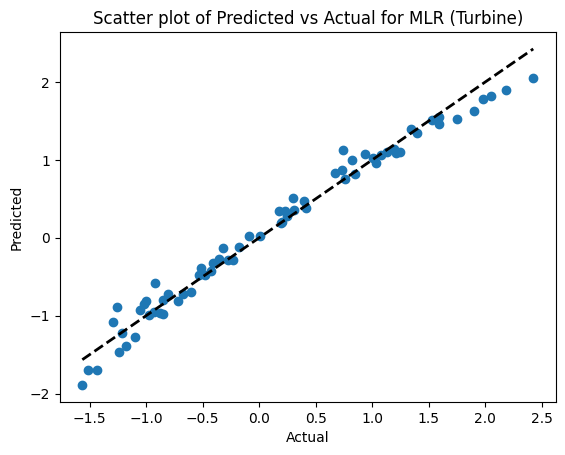

In [33]:
plt.scatter(y_test, y_pred_test)
plt.title('Scatter plot of Predicted vs Actual for MLR (Turbine)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line
plt.show()
